# SMOTE + ENN and SMOTE + Tomek Links

Combined used of SMOTE and ENN or Tomek Links to amplify the minority class and remove noisy observations that might be created.

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks

from imblearn.combine import SMOTEENN, SMOTETomek

In [15]:
# create data

X, y = make_classification(n_samples=1000,
                           n_clusters_per_class=1,
                           n_features=2,
                           n_classes=2,
                           n_redundant=0,
                           weights=[0.99],
                           random_state=1,
                           class_sep=2)

# create this into a dataframe and series

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

X.shape, y.shape

((1000, 2), (1000,))

In [16]:
# check value counts
y.value_counts()

0    983
1     17
dtype: int64

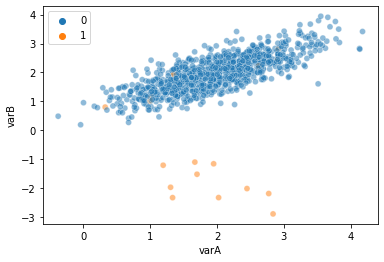

In [18]:
# plot and check

sns.scatterplot(data =X, x = 'varA', y ='varB', hue = y, alpha = 0.5)
plt.show()

In [19]:
# lets create SMOTE object

sm = SMOTE(sampling_strategy='auto',
           k_neighbors=5,
           n_jobs=2,
           random_state=0)

X_sm, y_sm = sm.fit_resample(X,y)

In [20]:
# Create SMOTEENN object

# first need to create an enn object as this sm and enn needs to be passed to SMOTEENN as params

enn = EditedNearestNeighbours(sampling_strategy='auto',
                              n_neighbors=3,
                              kind_sel='all',
                              n_jobs=2)

In [21]:
# now set up the smoteenn object

sm_enn = SMOTEENN(sampling_strategy='auto',
                  smote=sm,
                  enn=enn,
                  random_state=0,
                  n_jobs=2)

X_sm_enn, y_sm_enn = sm_enn.fit_resample(X,y)

In [23]:
# similary lets set up the tomeklink object and smotetomek object

tm = TomekLinks(sampling_strategy='all',n_jobs=2)

sm_tm = SMOTETomek(sampling_strategy='auto',
                   smote=sm,
                   tomek=tm,
                   random_state=0,
                   n_jobs=2)

X_sm_tm, y_sm_tm = sm_tm.fit_resample(X,y)

In [24]:
# check the shapes

X.shape, X_sm.shape, X_sm_enn.shape, X_sm_tm.shape

((1000, 2), (1966, 2), (1735, 2), (1834, 2))

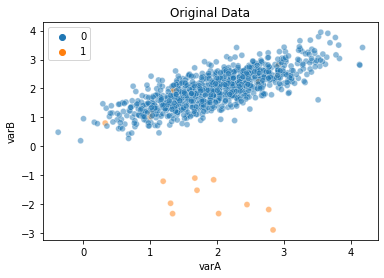

In [26]:
# lets plot and check

sns.scatterplot(data =X, x = 'varA', y ='varB', hue = y, alpha = 0.5)
plt.title('Original Data')
plt.show()

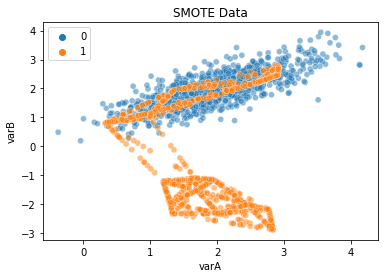

In [27]:
# lets plot and check

sns.scatterplot(data =X_sm, x = 'varA', y ='varB', hue = y_sm, alpha = 0.5)
plt.title('SMOTE Data')
plt.show()

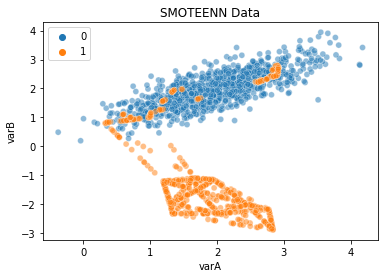

In [28]:
# lets plot and check

sns.scatterplot(data =X_sm_enn, x = 'varA', y ='varB', hue = y_sm_enn, alpha = 0.5)
plt.title('SMOTEENN Data')
plt.show()

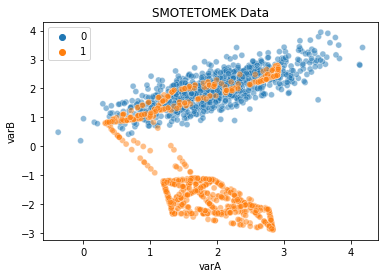

In [29]:
# lets plot and check

sns.scatterplot(data =X_sm_tm, x = 'varA', y ='varB', hue = y_sm_tm, alpha = 0.5)
plt.title('SMOTETOMEK Data')
plt.show()

## check with data from imblearn

In [30]:
from imblearn.datasets import fetch_datasets

In [55]:
datasets_ls = [
    'letter_img',
    'libras_move',
    'oil'
]

In [56]:
# write a function to perform all these and generate plots

def run_tests(X,y, dataset):
    
    sm = SMOTE(sampling_strategy='auto',
           k_neighbors=5,
           n_jobs=2,
           random_state=0)

    X_sm, y_sm = sm.fit_resample(X,y)
    
    enn = EditedNearestNeighbours(sampling_strategy='auto',
                              n_neighbors=3,
                              kind_sel='all',
                              n_jobs=2)
    
    # now set up the smoteenn object

    sm_enn = SMOTEENN(sampling_strategy='auto',
                      smote=sm,
                      enn=enn,
                      random_state=0,
                      n_jobs=2)

    X_sm_enn, y_sm_enn = sm_enn.fit_resample(X,y)
    
    # similary lets set up the tomeklink object and smotetomek object

    tm = TomekLinks(sampling_strategy='all',n_jobs=2)

    sm_tm = SMOTETomek(sampling_strategy='auto',
                       smote=sm,
                       tomek=tm,
                       random_state=0,
                       n_jobs=2)

    X_sm_tm, y_sm_tm = sm_tm.fit_resample(X,y)
    
    print('Shapes of the data')
    print(X.shape, X_sm.shape, X_sm_enn.shape, X_sm_tm.shape)
    
    # lets plot and check

    sns.scatterplot(data =X, x = '0', y ='1', hue = y, alpha = 0.5)
    plt.title('{} Original Data'.format(dataset))
    plt.show()
    
    sns.scatterplot(data =X_sm, x = '0', y ='1', hue = y_sm, alpha = 0.5)
    plt.title('{} SMOTE Data'.format(dataset))
    plt.show()
    
    sns.scatterplot(data =X_sm_enn, x = '0', y ='1', hue = y_sm_enn, alpha = 0.5)
    plt.title('{} SMOTEENN Data'.format(dataset))
    plt.show()
    
    sns.scatterplot(data =X_sm_tm, x = '0', y ='1', hue = y_sm_tm, alpha = 0.5)
    plt.title('{} SMOTETomek Data'.format(dataset))
    plt.show()
    
    print()

letter_img
Shapes of the data
(20000, 16) (38532, 16) (38532, 16) (38532, 16)


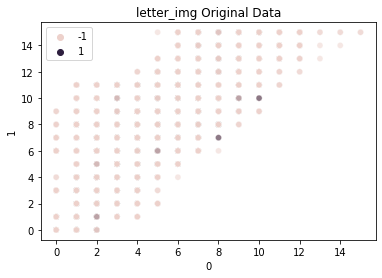

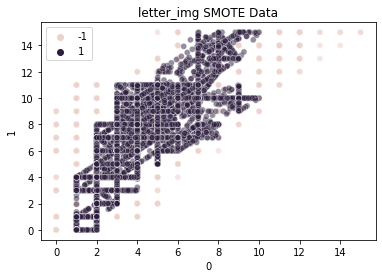

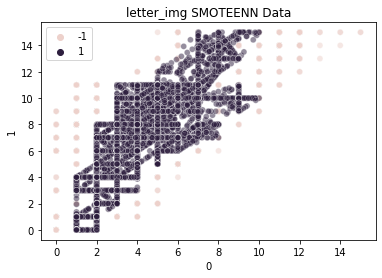

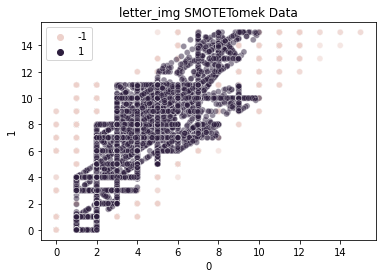


libras_move
Shapes of the data
(360, 90) (672, 90) (672, 90) (672, 90)


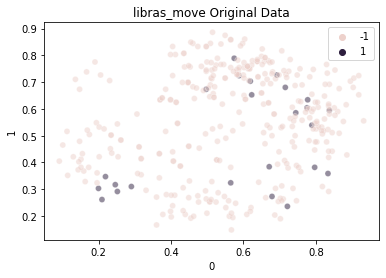

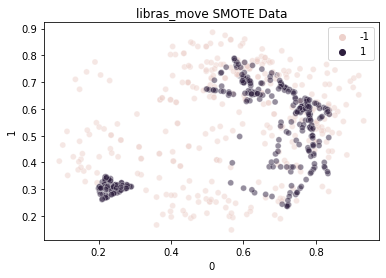

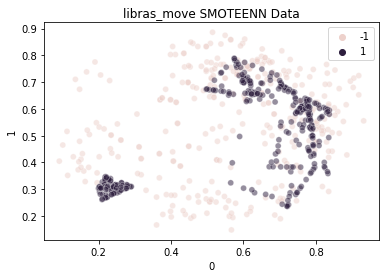

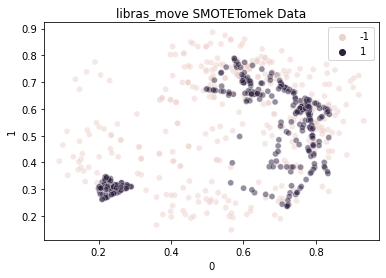


oil
Shapes of the data
(937, 49) (1792, 49) (1552, 49) (1702, 49)


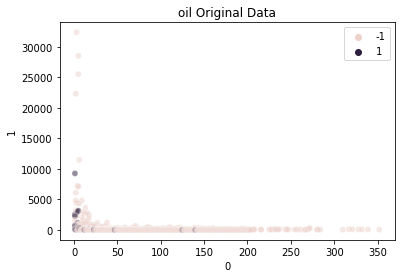

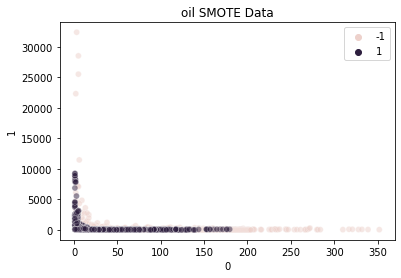

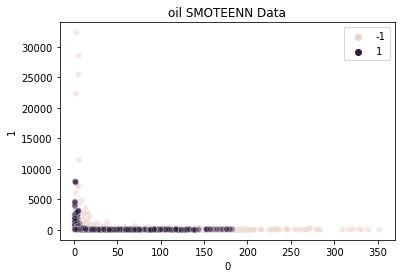

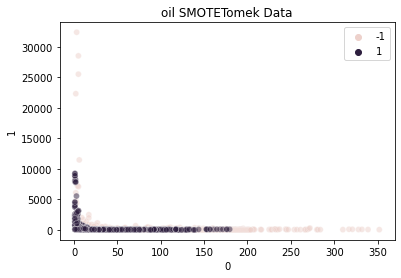

In [57]:
# write code to run the test for all datasets
for dataset in datasets_ls:
    print(dataset)
    data = fetch_datasets()[dataset]

    X = data.data
    y = data.target

    columns = list(map(str, list(range(X.shape[1]))))

    X = pd.DataFrame(data = X, columns=columns)
    y = pd.Series(y)
    
    run_tests(X,y,dataset)

- So here we can see that implementation of over and under sampling methods depends on the nature and distribution of the data
- We need to consider the clusters, shapes and the overall distribution of the data and then decide which method to use and what hyper paramters would result in an optimum dataset
- Additionally since there is no as such hard and fast thumb rules for implementing such methods, we will also need to try several methods, several combinations of hyper parameters to find the optimal result